# Black Friday

## Project Objective
- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month.
- The objective is to clean, prepare and analyse the Black friday Sales dataset taken from Analytics Vidhya.
- We have to analyze and the sales of an product in the retail store based on age, gender, marital status, occupation of the dataset. 

## Dataset information:
- The dataset used in this analysis contains information of transactions in a store on Black Friday, including customers' demographical features (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and transaction details also total purchase amount from last month.
- The dataset comes from a competition hosted by Analytics Vidhya.
- The dataset has 783667 rows and 12 columns.

In [44]:
## Importing Basic Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
%matplotlib inline

In [76]:
pd.set_option('display.max_rows', 530)

### Data Collection

In [45]:
final_df=pd.read_csv('Black_Friday.csv')

### Data Understanding

In [13]:
final_df.shape

(783667, 12)

In [46]:
final_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [47]:
final_df = final_df.rename(columns={'User_ID':'user_id', 
                         'Product_ID': 'product_id', 
                         'Gender': 'gender', 
                         'Age': 'age', 
                         'Occupation': 'occupation',
                         'City_Category': 'city_category', 
                         'Stay_In_Current_City_Years': 'stay_in_current_city_years', 
                         'Marital_Status':'marital_status', 
                         'Product_Category_1': 'product_category_1', 
                         'Product_Category_2': 'product_category_2',
                         'Product_Category_3': 'product_category_3',
                         'Purchase':'purchase'
                         })

In [48]:
final_df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     783667 non-null  int64  
 1   product_id                  783667 non-null  object 
 2   gender                      783667 non-null  object 
 3   age                         783667 non-null  object 
 4   occupation                  783667 non-null  int64  
 5   city_category               783667 non-null  object 
 6   stay_in_current_city_years  783667 non-null  object 
 7   marital_status              783667 non-null  int64  
 8   product_category_1          783667 non-null  int64  
 9   product_category_2          537685 non-null  float64
 10  product_category_3          237858 non-null  float64
 11  purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [50]:
final_df.describe()

,user_id,occupation,marital_status,product_category_1,product_category_2,product_category_3,purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Data Cleaning

In [51]:
## As we are not doing analysis based on each user hence, deleting user_id column.
final_df.drop(['user_id'],axis=1,inplace=True)

In [52]:
final_df.head()

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [53]:
#Handling the categorical feature Gender column
final_df['gender']=final_df['gender'].map({'F':0,'M':1})

In [54]:
final_df.head()

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [55]:
pd.get_dummies(final_df['gender'])

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,1,0


In [56]:
final_df['age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [57]:
# Age column have age range values, using map function giving ranks with respect to age range for example 0-17 is 1 , 18-25 is 2 and so on.
final_df['age']=final_df['age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})


In [58]:
df.head()

,product_iD,gender,age,occupation,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase,B,C
0,P00069042,0,NaN,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,NaN,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,NaN,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,NaN,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,NaN,16,4+,0,8,NaN,NaN,7969.0,0,1


In [59]:
pd.get_dummies(final_df['city_category'])

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
783662,0,1,0
783663,0,1,0
783664,0,1,0
783665,0,0,1


In [60]:
final_df['city_category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [61]:
### converting categories into numeric i.e replacing each city category by 0 for B, 1 for C, and B = 0 C = 0 means category C, hence removing 1 column.
df_city = pd.get_dummies(final_df['city_category'],drop_first=True)


In [62]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [63]:
df = pd.concat([final_df,df_city],axis=1)
df.head()

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [64]:
df.drop('city_category',axis=1,inplace=True)

### Handling Null Values

In [95]:
df[df.product_category_1.isnull()]

,product_id,gender,age,occupation,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase,B,C


In [66]:
final_df[['product_id','product_category_2']].nunique()

product_id            3677
product_category_2      17
dtype: int64

In [ ]:
product_id --> product_category_1, product_category_2, product_category_3, purchase

In [155]:
factors=['product_category_1','product_category_2','pproduct_category_3','purchase']
test = pd.DataFrame()
test['product_id'] = final_df['product_id'].unique()
test['product_category_1'] = final_df.groupby('product_id')['product_category_1'].apply(lambda x: np.unique(x)).reset_index()['product_category_1']
test['product_category_2'] = final_df.groupby('product_id')['product_category_2'].apply(lambda x: np.unique(x)).reset_index()['product_category_2'] 
test['product_category_3'] = final_df.groupby('product_id')['product_category_3'].apply(lambda x: np.unique(x)).reset_index()['product_category_3'] 
test


,product_id,product_category_1,product_category_2,product_category_3
0,P00069042,[3],[4.0],[5.0]
1,P00248942,[2],[4.0],[9.0]
2,P00087842,[5],[14.0],[0.0]
3,P00085442,[5],[8.0],[0.0]
4,P00285442,[5],[0.0],[0.0]
...,...,...,...,...
3672,P00166542,[8],[0.0],[0.0]
3673,P00249942,[8],[0.0],[0.0]
3674,P00030342,[3],[4.0],[5.0]
3675,P00074942,[5],[12.0],[14.0]


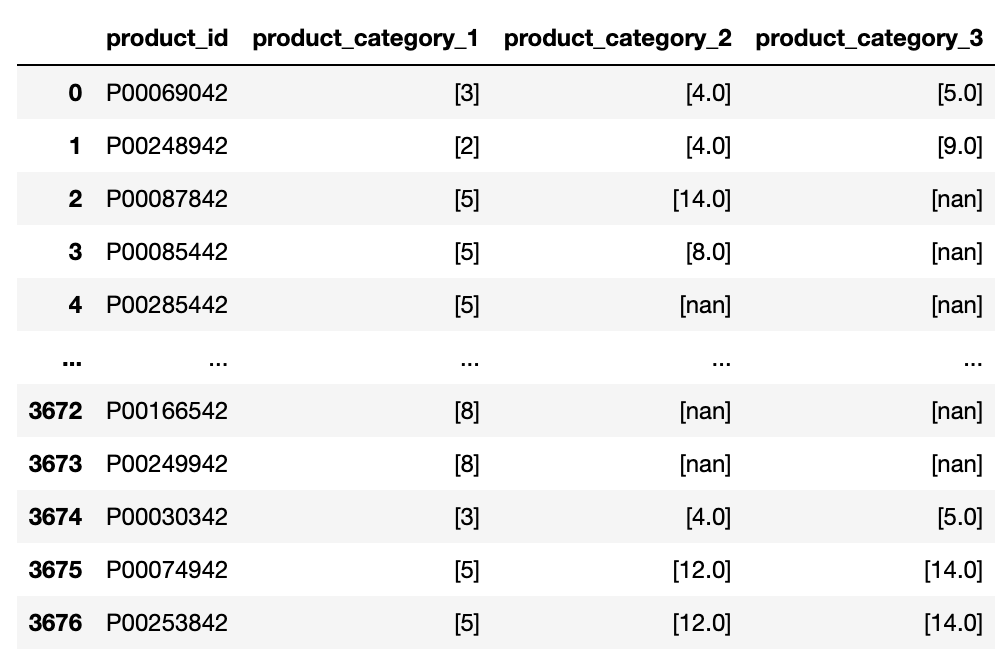

In [142]:
final_df['product_category_2'] = final_df['product_category_2'].fillna(0)

In [143]:
final_df['product_category_3'] = final_df['product_category_3'].fillna(0)

In [144]:
final_df['purchase'] = final_df['purchase'].fillna(test.groupby('product_id')['purchase'].transform('mean'))

In [145]:
final_df.purchase.isnull().sum()

61

In [146]:
final_df[final_df.purchase.isnull()].product_id.unique()

array(['P00168242', 'P00336842', 'P00100242', 'P00227242', 'P00306842',
       'P00092742', 'P00012642', 'P00309842', 'P00315342', 'P0099542',
       'P00359842', 'P00156942', 'P00013042', 'P00082142', 'P00279042',
       'P00268942', 'P00061642', 'P00077642', 'P00165542', 'P00062542',
       'P00300142', 'P00105742', 'P00140842', 'P00236842', 'P00172942',
       'P00056942', 'P00039042', 'P00270342', 'P00062242', 'P00058842',
       'P00322842', 'P00322642', 'P00294942', 'P00312642', 'P00042642',
       'P00082642', 'P00038942', 'P00063942', 'P00106242', 'P00204642',
       'P00239542', 'P00166542', 'P00249942', 'P00030342', 'P00074942',
       'P00253842'], dtype=object)

In [147]:
final_df[final_df.product_id.isin(['P00168242'])]

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
550098,P00168242,1,3,0,B,1,0,5,16.0,0.0,NaN
613016,P00168242,1,3,0,C,1,1,5,16.0,0.0,NaN


In [153]:
final_df[final_df.product_id.isin(['P00265242'])]

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
399,P00265242,1,3,18,C,2,0,5,8.0,0.0,8652.000000
1191,P00265242,0,4,9,C,4+,0,5,8.0,0.0,8767.000000
1372,P00265242,1,3,1,A,1,0,5,8.0,0.0,6944.000000
1845,P00265242,1,2,4,B,4+,0,5,8.0,0.0,8628.000000
2209,P00265242,1,3,12,A,2,1,5,8.0,0.0,8593.000000
...,...,...,...,...,...,...,...,...,...,...,...
782265,P00265242,1,3,1,A,1,1,5,8.0,0.0,7534.848404
782307,P00265242,1,5,6,C,0,1,5,8.0,0.0,7534.848404
782370,P00265242,0,5,0,C,3,1,5,8.0,0.0,7534.848404
782993,P00265242,1,3,17,B,1,1,5,8.0,0.0,7534.848404


In [148]:
final_df['purchase'] = final_df['purchase'].fillna(0)

In [149]:
final_df.purchase.isnull().sum()

0

In [150]:
final_df.isnull().sum()

product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category_1            0
product_category_2            0
product_category_3            0
purchase                      0
dtype: int64

In [24]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [30]:
final_df.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00030342',
       'P00074942', 'P00253842'], dtype=object)

In [26]:
## To find value counts within column
df['Purchase'].value_counts()

7011.0     191
7193.0     188
6855.0     187
6891.0     184
6960.0     183
          ... 
14160.0      1
21357.0      1
10400.0      1
15119.0      1
11139.0      1
Name: Purchase, Length: 18105, dtype: int64

In [44]:
df.shape

(783667, 12)

In [45]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [127]:
# To handle 'Stay_In_Current_City_Years' column

In [46]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [47]:
type('4+')

str

In [132]:
type('Stay_In_Current_City_Years')

str

In [129]:
# We will replace 4+ with 4 years in Stay_in_current_city_years column

In [49]:
df['Stay_In_Current_City_Years'].str.replace("+"," ")

<ipython-input-49-0ac4ee6f2e35>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years'].str.replace("+"," ")


0          2
1          2
2          2
3          2
4         4 
          ..
233594    4 
233595    4 
233596    4 
233597    4 
233598    4 
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [50]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+"," ")

<ipython-input-50-9f1fdd812c2c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace("+"," ")


In [135]:
df['Stay_In_Current_City_Years']

0          2
1          2
2          2
3          2
4         4 
          ..
233594    4 
233595    4 
233596    4 
233597    4 
233598    4 
Name: Stay_In_Current_City_Years, Length: 783667, dtype: object

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [137]:
# We have to convert df['Stay_In_Current_City_Years'] column object to integer
# Converting Object to integer

In [52]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      0 non-null       float64
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(2)
memory usage: 67.3+ MB


In [140]:
# converting B and C column in integer

In [53]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [144]:
# Visulaisation Age vs Purchase

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

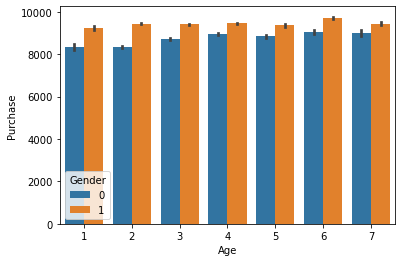

In [56]:
sns.barplot(x='Age',y='Purchase', hue='Gender', data=df)

In [150]:
df["Purchase"].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,    nan])

In [151]:
df["Purchase"].value_counts()

7011.0     191
7193.0     188
6855.0     187
6891.0     184
6960.0     183
          ... 
14160.0      1
21357.0      1
10400.0      1
15119.0      1
11139.0      1
Name: Purchase, Length: 18105, dtype: int64

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

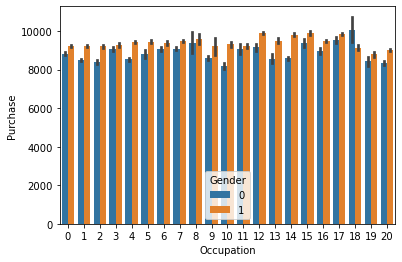

In [57]:
# Visulaisation Purchase vs Occupation
sns.barplot('Occupation','Purchase', hue='Gender', data=df)

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

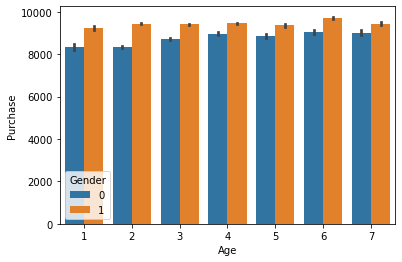

In [58]:
# Visulaisation Purchase vs Occupation
sns.barplot('Age','Purchase', hue='Gender', data=df)

Conclusion: Purchasing of men is high than women

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

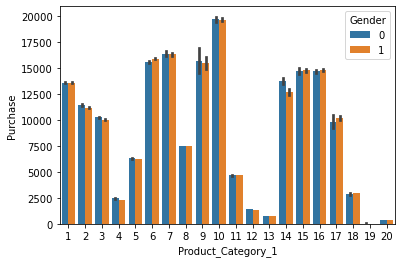

In [60]:
# Visualisation of Product_categories Vs Purchse
sns.barplot('Product_Category_1','Purchase', hue='Gender', data=df)

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

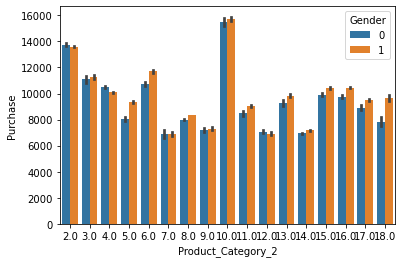

In [61]:
sns.barplot('Product_Category_2','Purchase', hue='Gender', data=df)

/Users/ganesh_dhasade/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

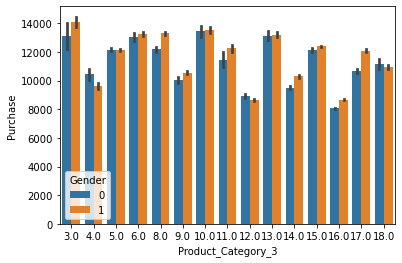

In [62]:
sns.barplot('Product_Category_3','Purchase', hue='Gender', data=df)

Conclusion: Product_Category_1 has been purchased more than Product_Category_2 and Product_Category_3 